In [1]:
import os
import sys
from xg_utils import *
from plotter  import *
from constants import *
sys.path.append(os. path.join(os.path.dirname(os.getcwd()), 'general/'))
from data_loader import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


exp00_dofetilide_W5_D1_i51_e52.pkl 0
exp00_dofetilide_W5_D1_i51_e52.pkl 1
exp00_dofetilide_W5_D1_i51_e52.pkl 2
exp00_dofetilide_W5_D1_i51_e52.pkl 3
exp00_dofetilide_W5_D1_i51_e52.pkl 4
exp00_dofetilide_W5_D1_i51_e52.pkl 5
exp00_dofetilide_W5_D1_i51_e52.pkl 6
exp00_dofetilide_W5_D1_i51_e52.pkl 7
exp00_dofetilide_W5_D1_i51_e52.pkl 8
exp00_dofetilide_W5_D1_i51_e52.pkl 9
exp00_dofetilide_W5_D1_i51_e52.pkl 10
exp00_dofetilide_W5_D1_i51_e52.pkl 11
exp00_dofetilide_W5_D1_i51_e52.pkl 12
exp00_dofetilide_W5_D1_i51_e52.pkl 13
exp00_dofetilide_W5_D1_i51_e52.pkl 14
exp00_dofetilide_W5_D1_i51_e52.pkl 15
exp00_dofetilide_W5_D1_i51_e52.pkl 16
exp00_dofetilide_W5_D1_i51_e52.pkl 17
exp00_dofetilide_W5_D1_i51_e52.pkl 18
exp00_dofetilide_W5_D1_i51_e52.pkl 19
exp00_dofetilide_W5_D1_i51_e52.pkl 20
exp00_dofetilide_W5_D1_i51_e52.pkl 21
exp00_dofetilide_W5_D1_i51_e52.pkl 22
exp00_dofetilide_W5_D1_i51_e52.pkl 23
exp00_dofetilide_W5_D1_i51_e52.pkl 24
exp00_dofetilide_W5_D1_i51_e52.pkl 25
exp00_dofetilide_W5_D1

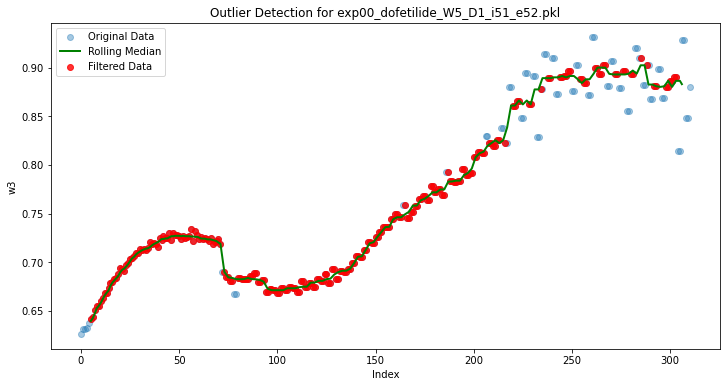

exp00_dofetilide_W8_D3_i24_e14.pkl


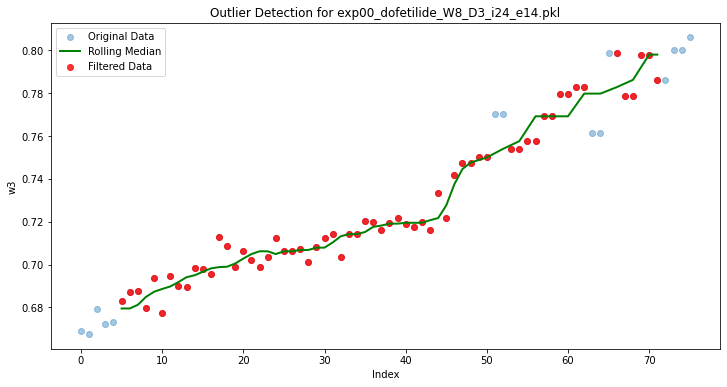

exp00_dofetilide_W8_D3_i61_e62.pkl


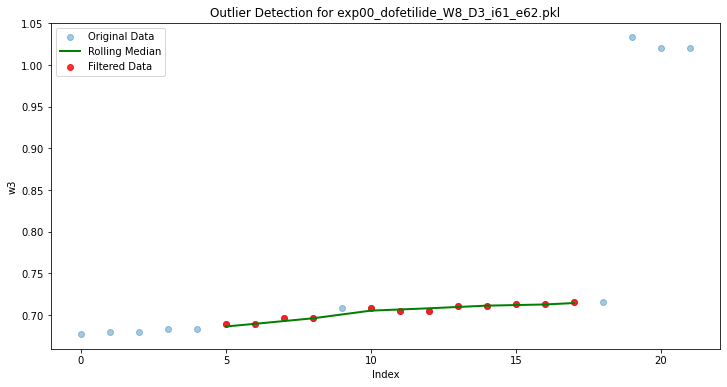

exp20_flecainide_W7_D2_i43_e42.pkl


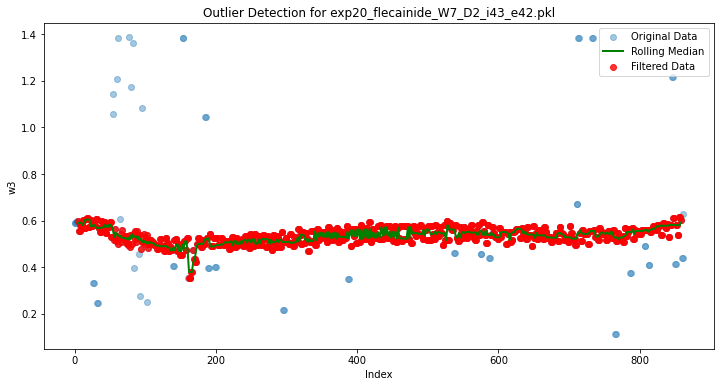

exp22_nifedipine_W5_D6_i55_e38_pace.pkl


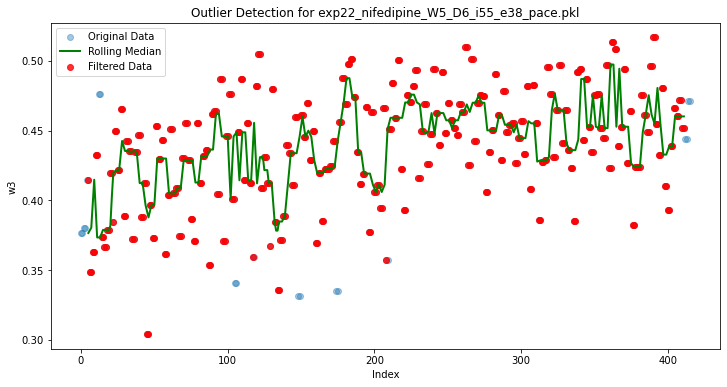

exp00_dofetilide_W8_D2_i57_e47.pkl


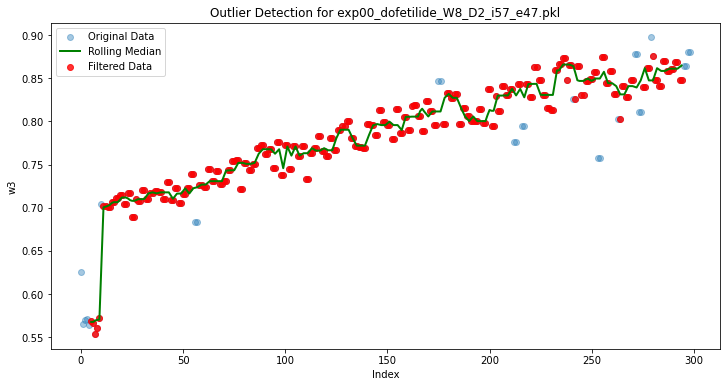

exp13_propranolol_W5_D1_i23_e13.pkl


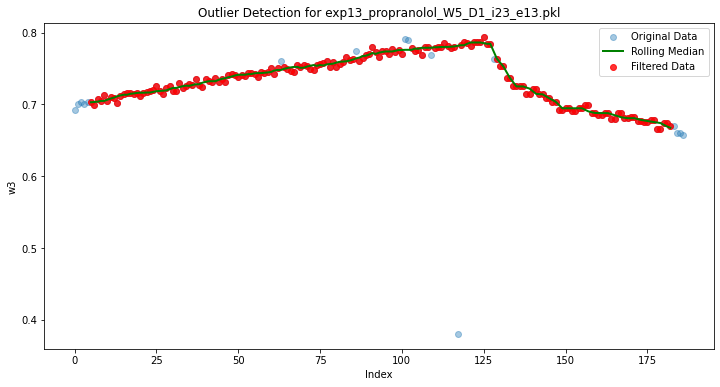

mea_2


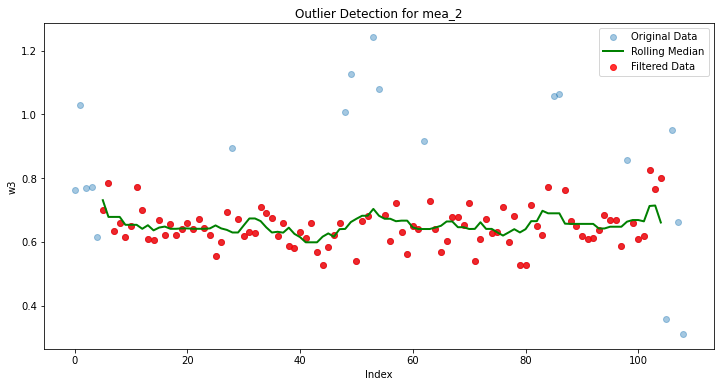

In [3]:
df_xgboost = feature_generater(data,all_keys,distorted_dic_xg,to_plot= False)
df_xgboost2 = post_screening(df_xgboost,  window_size=10, threshold_factor=4,to_exclude = to_exclude)

In [4]:
# # hyper parameter tunning
# df_xg2_trains = df_xgboost2[df_xg2['df_xgboost2'].isin(trains)]
# len(df_xg2_trains)
# def objective(trial):
#     param = {
#         # 'tree_method': 'gpu_hist',
#         'lambda': trial.suggest_float('lambda', 0.01, 50.0, log=True),
#         'alpha': trial.suggest_float('alpha', 0.01, 50.0, log=True),
#         'eta': trial.suggest_float('alpha', 0.01, 50.0, log=True),
#         'gamma':trial.suggest_float('alpha', 0.01, 50.0, log=True),
#         'min_child_weight': trial.suggest_int('min_child_weight', 2, 200),
#         'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7,8,9,10]),
#         'subsample': trial.suggest_categorical('subsample', [0.2,0.5,0.6,0.7,0.8,1.0]),
#         'random_state': 42,
#         # 'early_stopping_rounds': 10
#     }
#     total_error = 0
#     for name in list(np.unique(df_xg2_trains['name'])):  
#         df_train =  df_xg2_trains[~df_xg2_trains['name'].isin([name])] # Select rows where 'name' is in the current list
#         df_teste =  df_xg2_trains[df_xg2_trains['name'].isin([name])]
#         X_train, X_val, y_train, y_val = train_test_split(df_train[eap_xg_columns_screened], df_train[iap_columns], test_size=0.3, random_state=42)
#         model = XGBRegressor(**param,early_stopping_rounds=10)
#         model.fit(X_train, y_train, eval_set=[(X_val,y_val)], verbose=False)
#         preds = model.predict(df_teste[eap_xg_columns_screened])
#         error = mean_squared_error(df_teste[iap_columns], preds)
#         total_error += error
#     print(total_error)
#     return total_error

# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=500,n_jobs = -1 )

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))
# study.best_params

# best_params = study.best_params
# import json
# with open('best_params_SCREENED_all.json', 'w') as f:
#     json.dump(best_params, f)

# print("Best parameters saved to 'best_params.json'")

In [5]:
df_xg2 = df_xgboost2.reset_index()
df_traine = df_xg2[df_xg2['name'].isin(trains)]
df_test1 = df_xg2[df_xg2['name'] == 'exp00_dofetilide_W8_D2_i57_e47.pkl']
df_test2 = df_xg2[df_xg2['name'] == 'exp13_propranolol_W5_D1_i23_e13.pkl']
df_test3 = df_xg2[df_xg2['name'] == 'mea_2']  # Third test set
# Train-test split for training data
x_train, x_val, y_train, y_val = train_test_split(df_traine[eap_xg_columns_screened], df_traine[iap_columns], test_size=0.2, random_state=42)
x_test1 = df_test1[eap_xg_columns_screened]
y_test1 = df_test1[iap_columns]
x_test2 = df_test2[eap_xg_columns_screened]
y_test2 = df_test2[iap_columns]
x_test3 = df_test3[eap_xg_columns_screened]
y_test3 = df_test3[iap_columns]
len(x_test2)

171

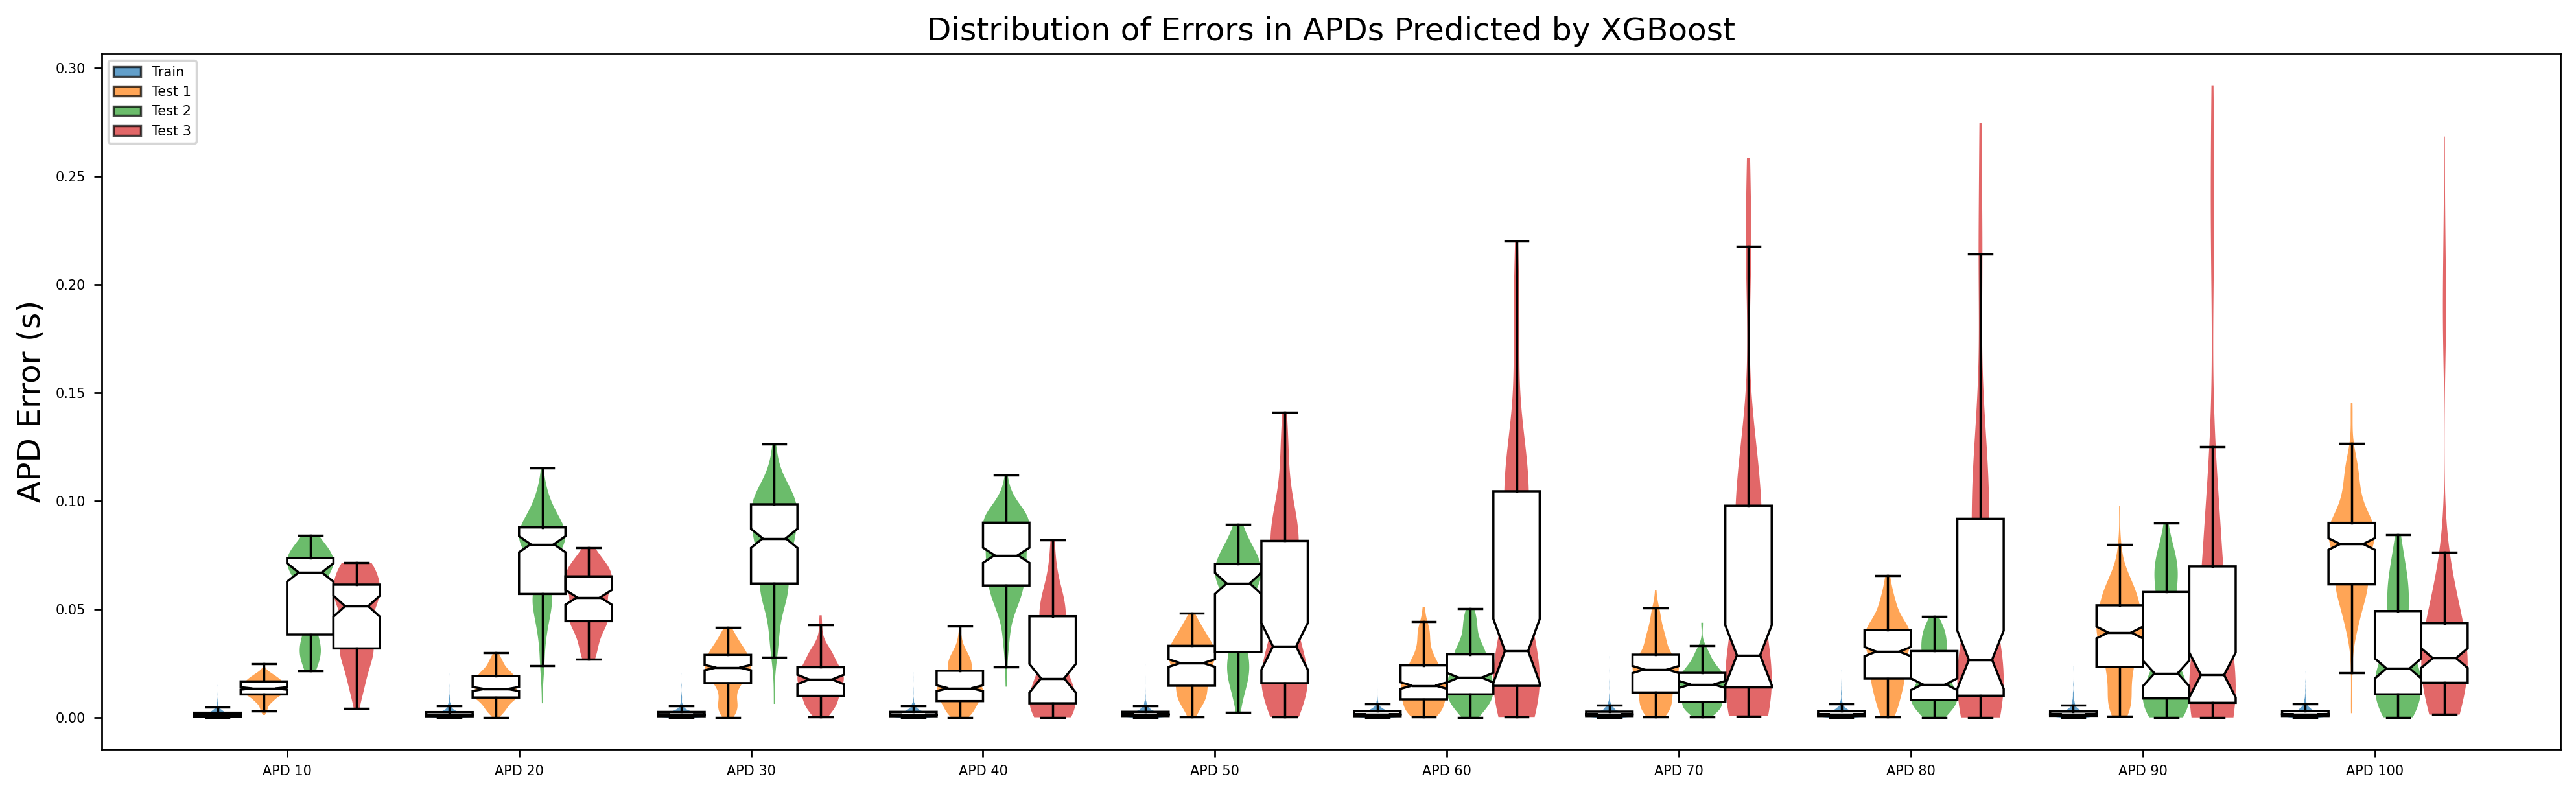

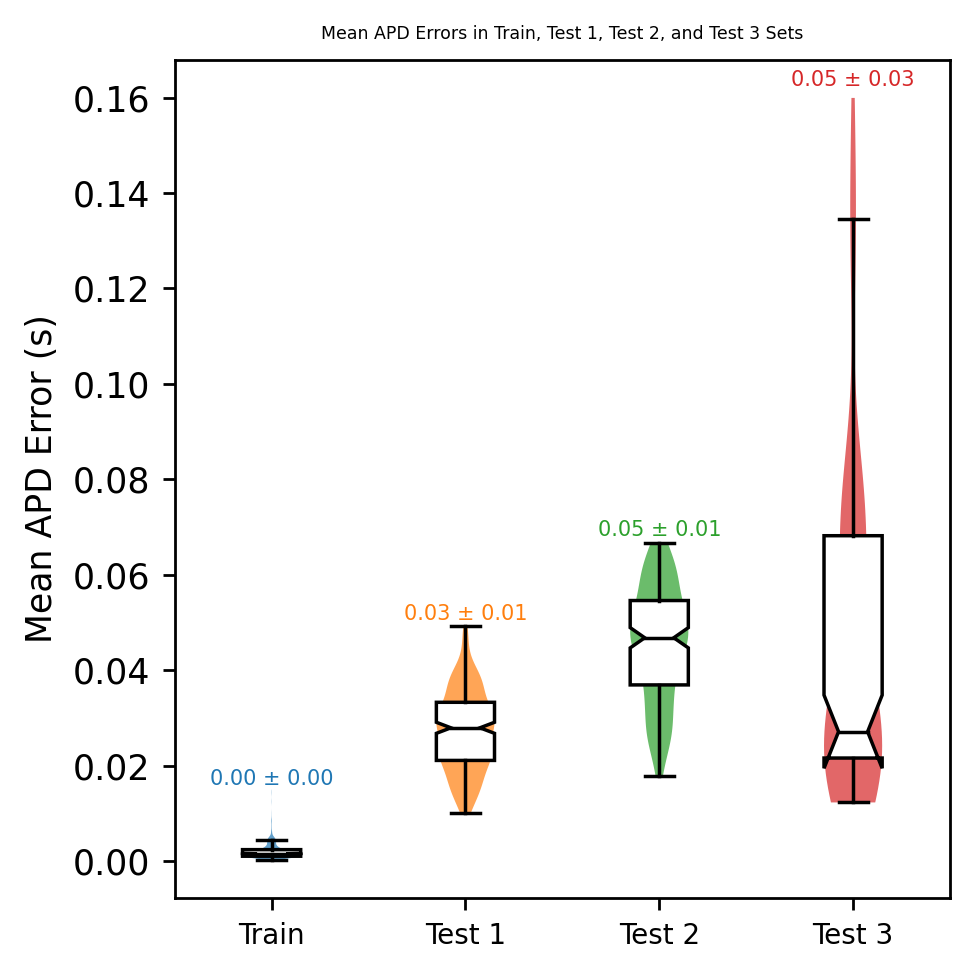

Train Mean: 0.0019789101731408883 Std: 0.0015515429653039465 Max: 0.014952475308850507
Test 1 Mean: 0.02716119784146916 Std: 0.008489948069211498 Max: 0.04915115498981069
Test 2 Mean: 0.045553702619540684 Std: 0.012086655637130803 Max: 0.0666483918723531
Test 3 Mean: 0.04617664452035217 Std: 0.03450401578766739 Max: 0.15994062334698
TEST 1__APD30: 5.418 ± 2.534
TEST 1__APD50: 3.737 ± 1.764
TEST 1__APD70: 2.650 ± 1.629
TEST 1__APD90: 4.058 ± 2.119
TEST 2__APD30: 17.057 ± 4.688
TEST 2__APD50: 7.893 ± 3.387
TEST 2__APD70: 1.971 ± 1.160
TEST 2__APD90: 3.986 ± 3.254
TEST 3__APD30: 4.397 ± 2.411
TEST 3__APD50: 9.802 ± 7.535
TEST 3__APD70: 10.997 ± 11.167
TEST 3__APD90: 7.835 ± 10.770


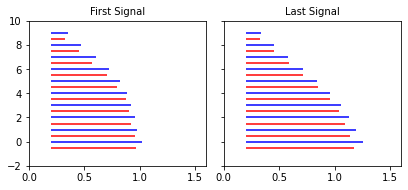

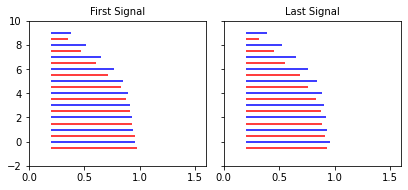

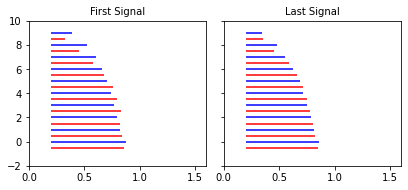

In [6]:
xg_model, preds, abs_apd_errors, perc_apd_errors = model_and_errors(best_params,x_train,y_train,x_val,y_val,x_test1,y_test1,x_test2,y_test2,x_test3,y_test3)
apd_dis_errors(abs_apd_errors,perc_apd_errors)
plot_test_comparison([y_test1, y_test2, y_test3], preds[1:])

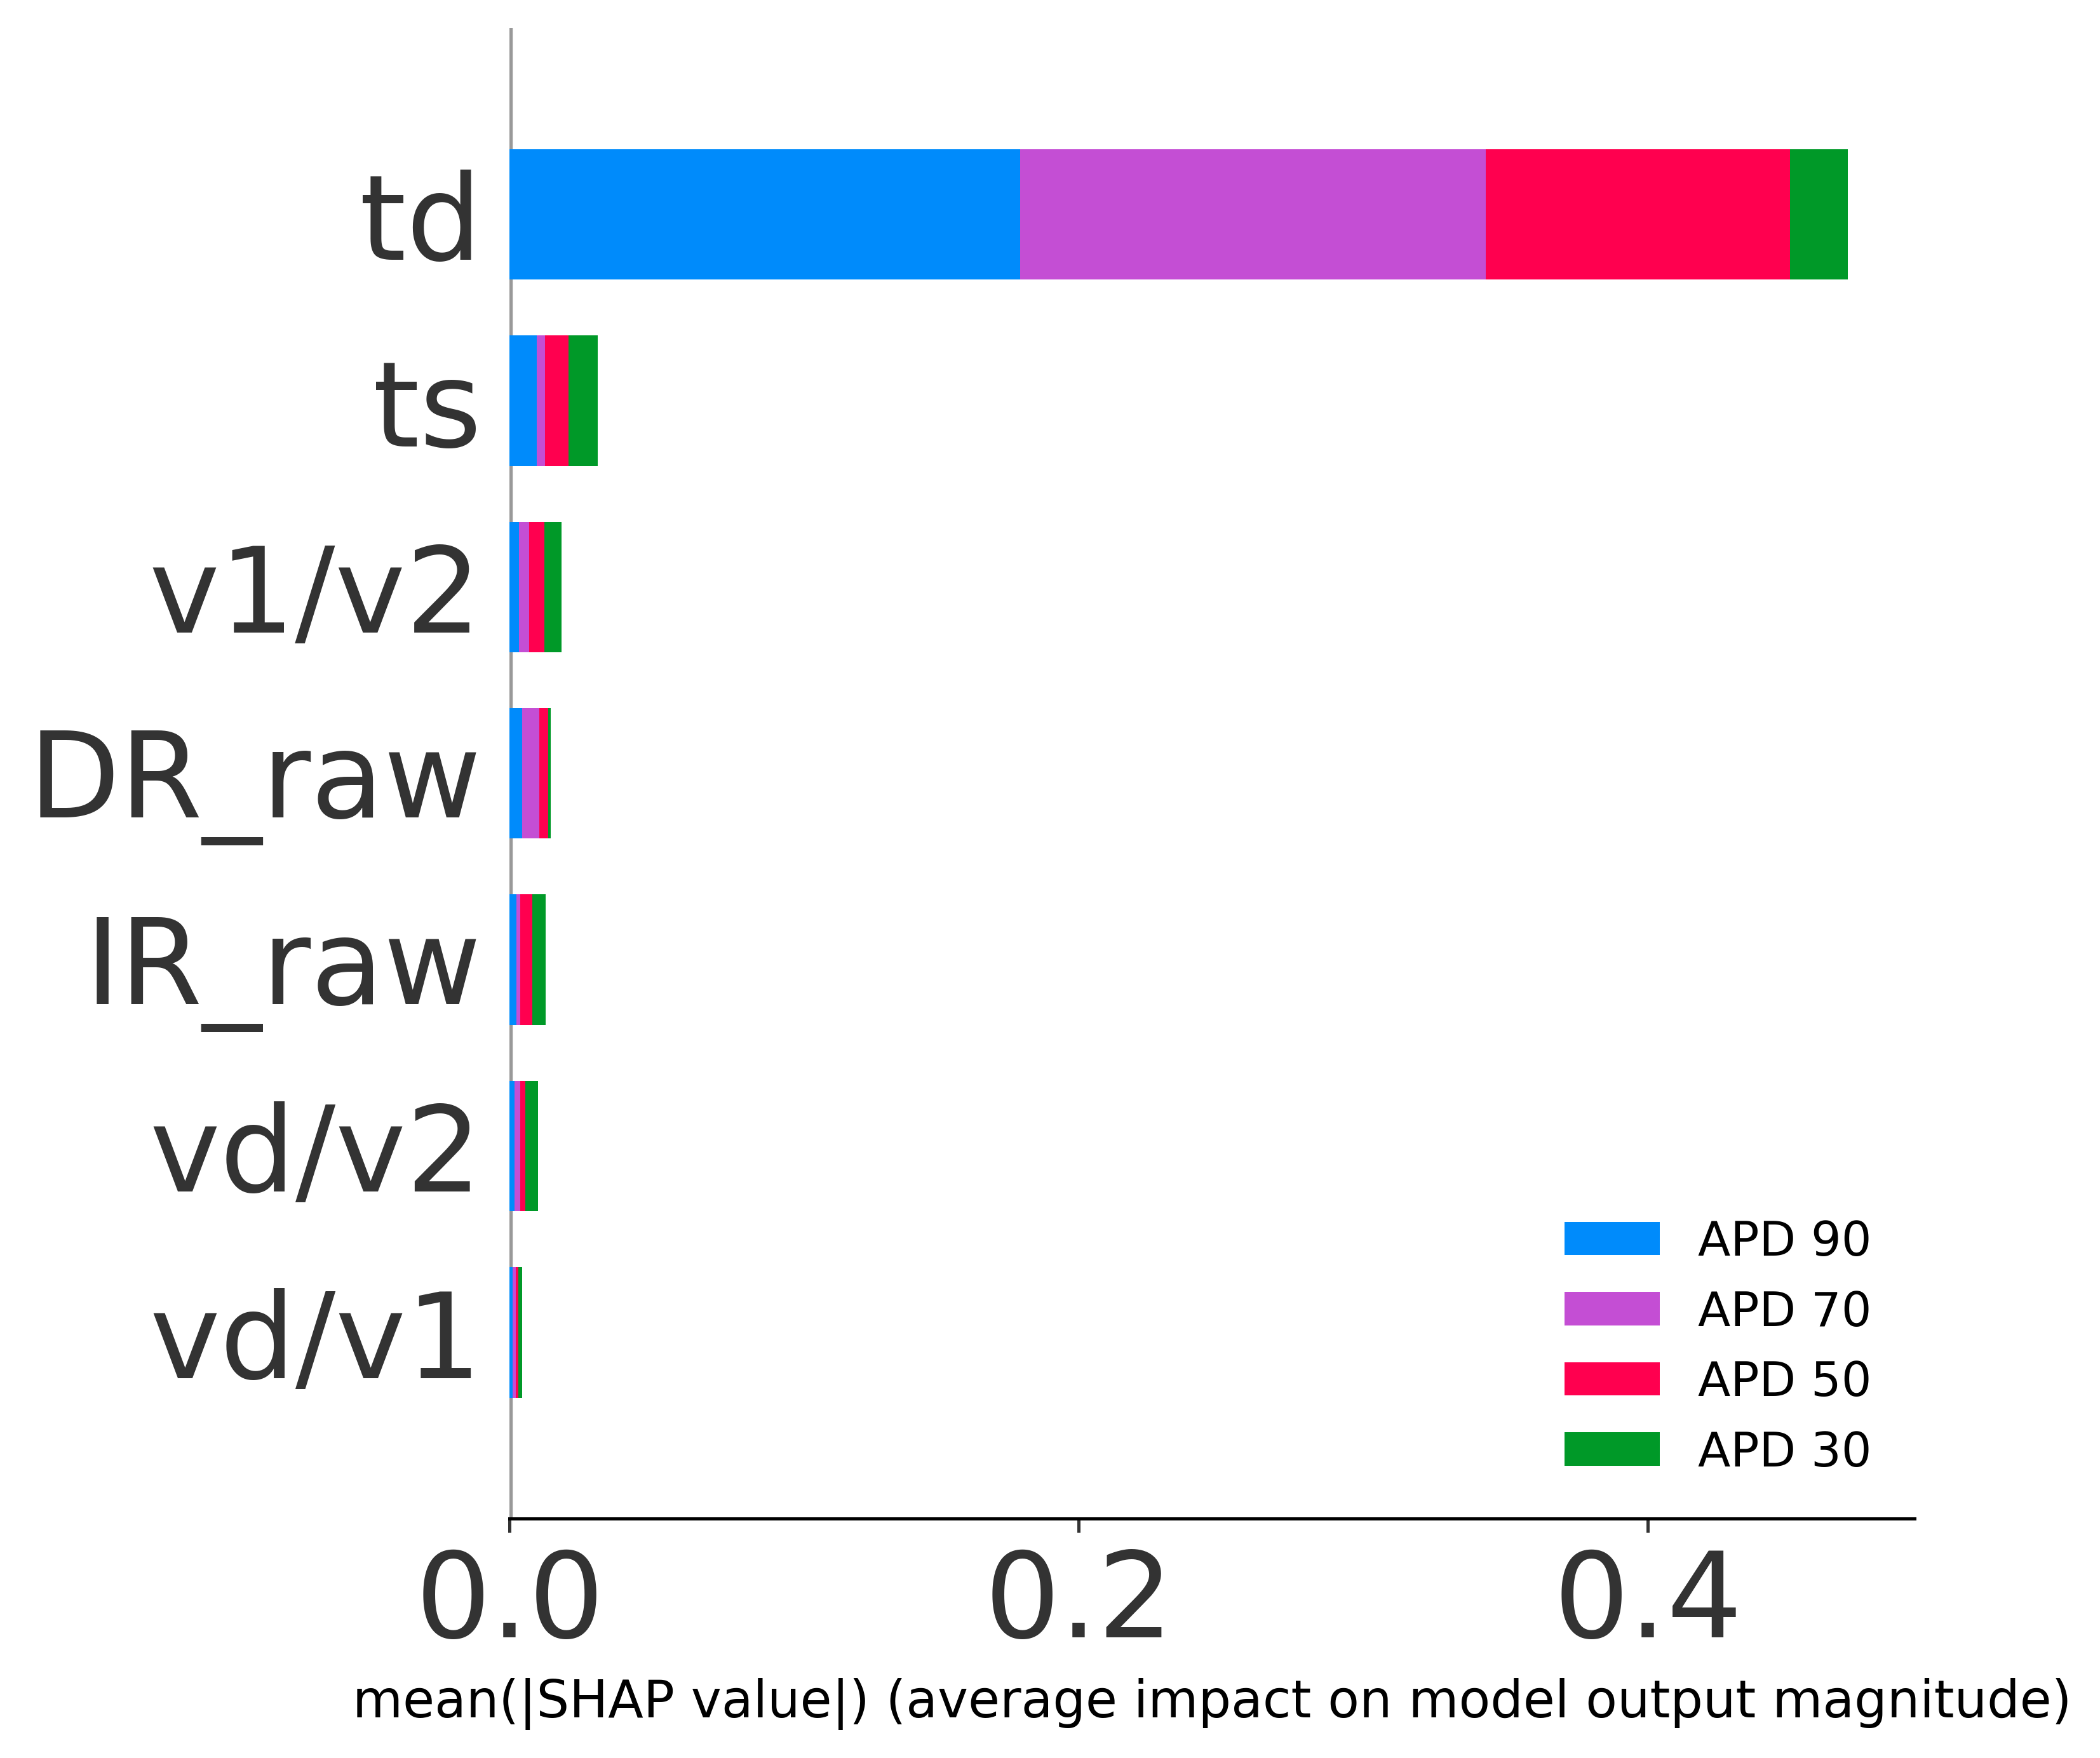

In [7]:
import matplotlib
z = pd.concat([x_test1,x_test2,x_test3])
explainer = shap.TreeExplainer(xg_model)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
plt.figure(figsize=(8, 5), dpi=450)
shap_values = explainer.shap_values(z)
shap.summary_plot([shap_values[:,:,i] for i in [2,4,6,8]], x_train, plot_size=(6, 6),
                  class_names=['APD ' + str(10 * i) for i in [3,5,7,9]],
                  cmap = cmap,
                  color=None,show=False
                  )
plt.tick_params(labelsize=30)  # Set the tick labels font size


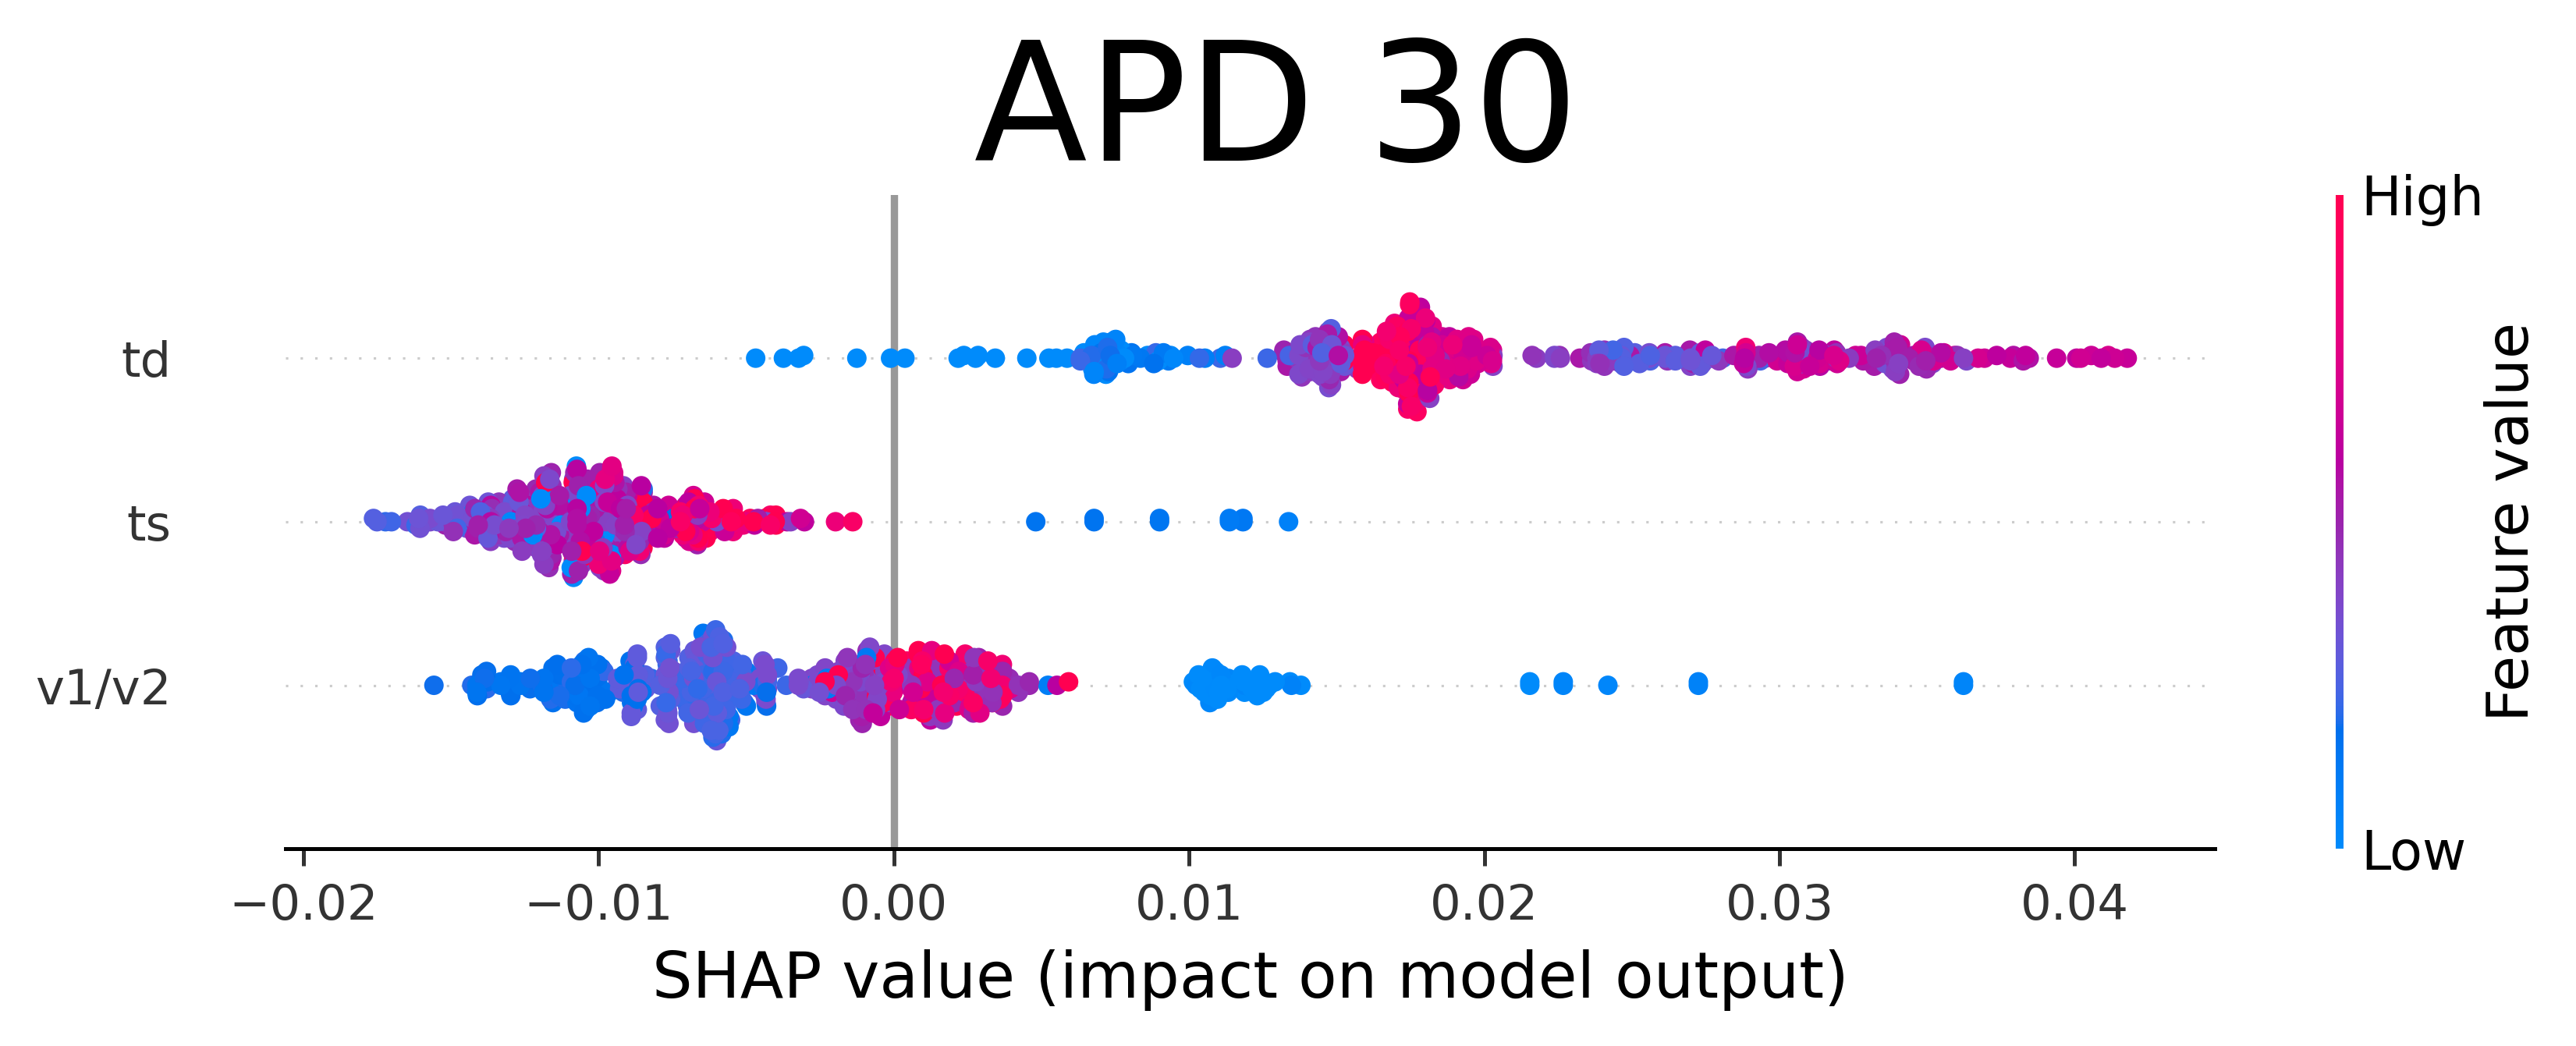

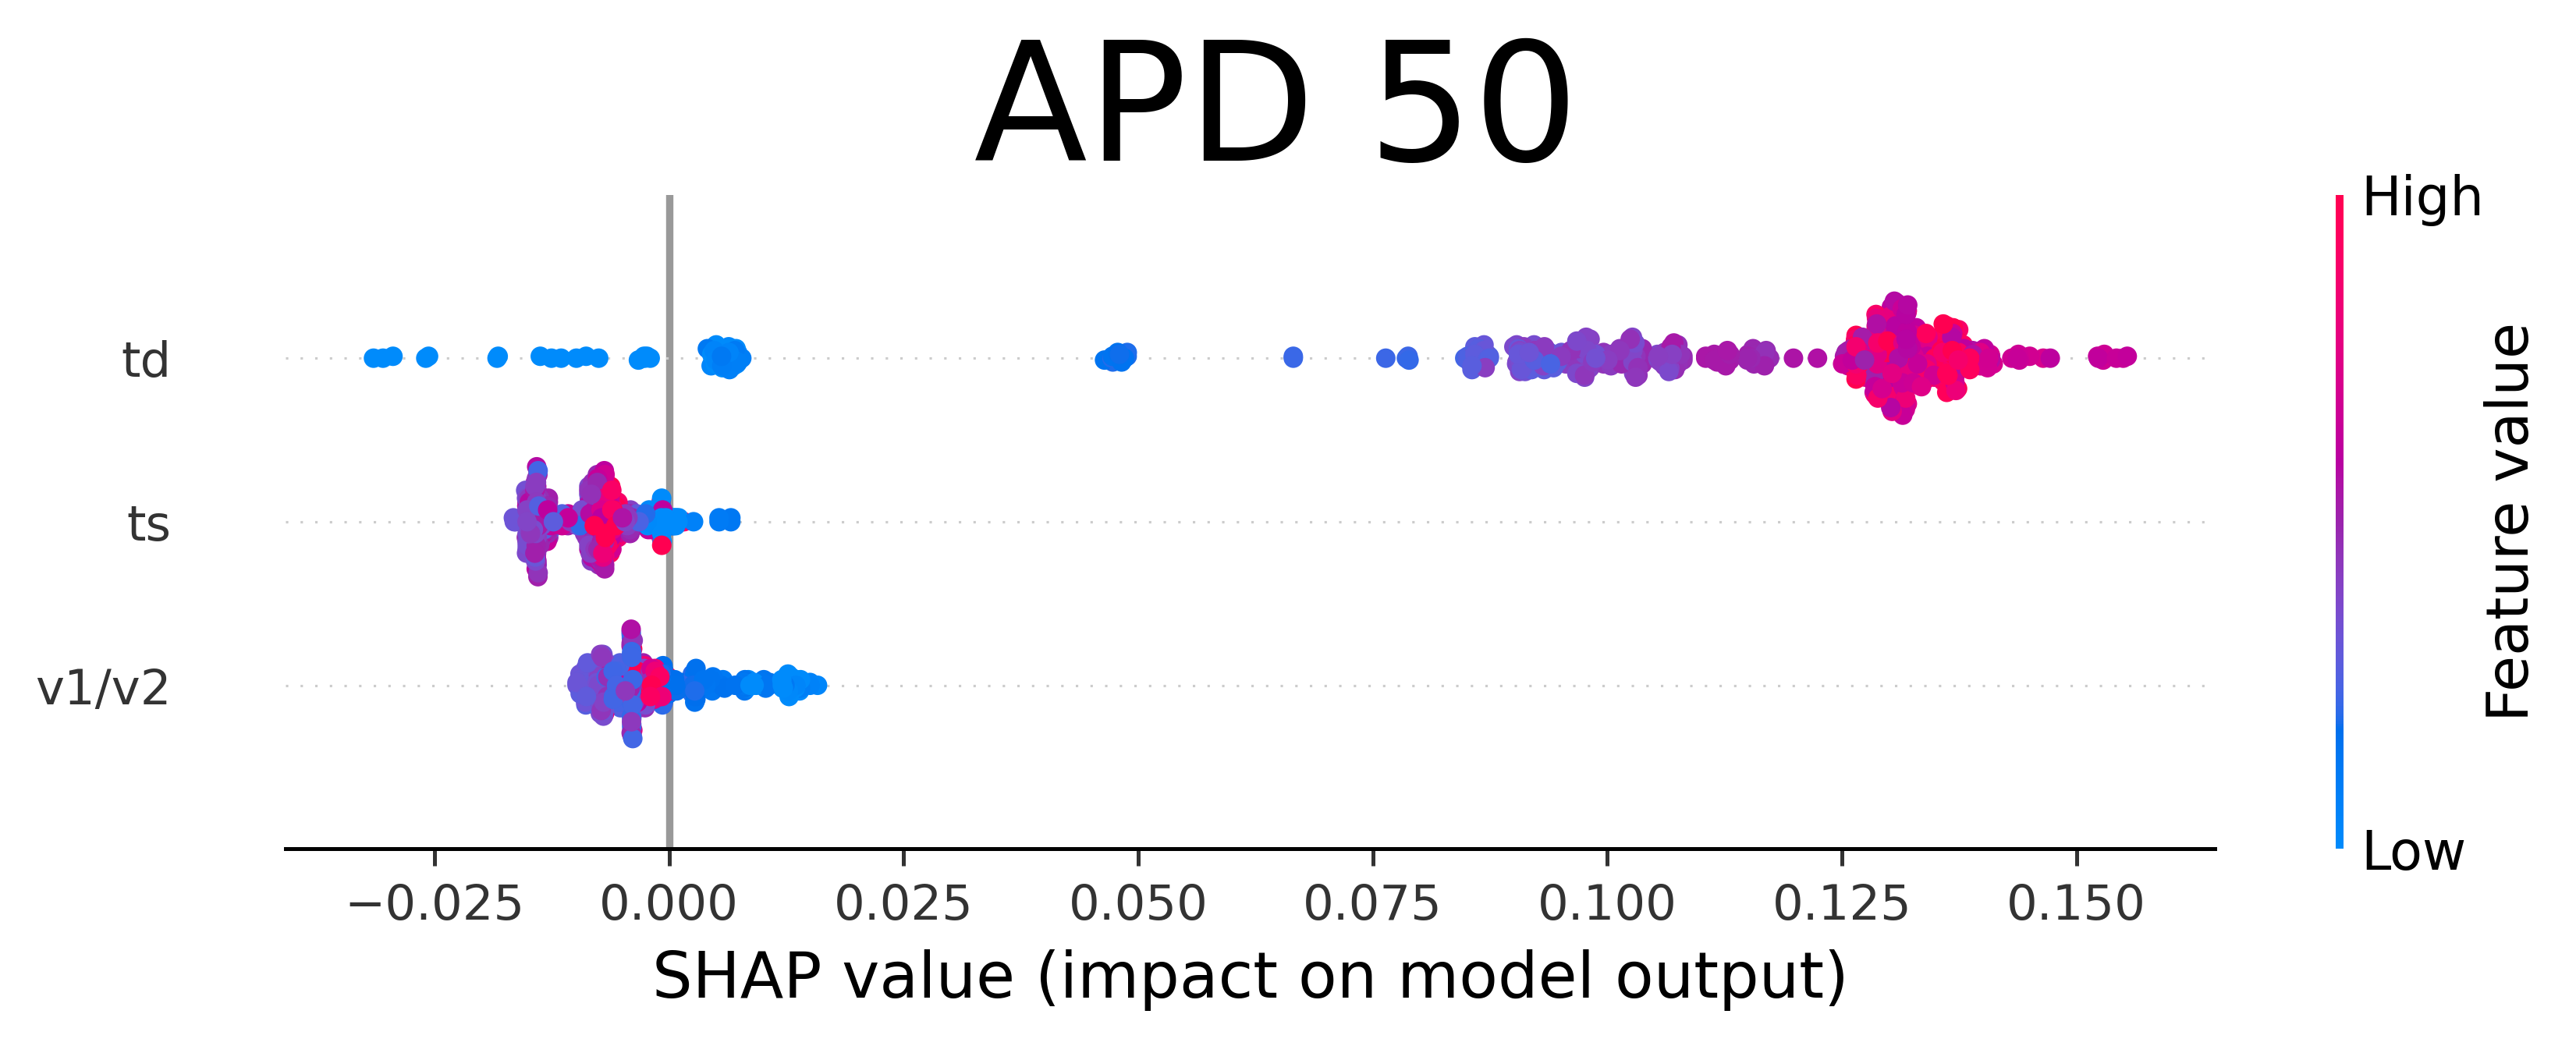

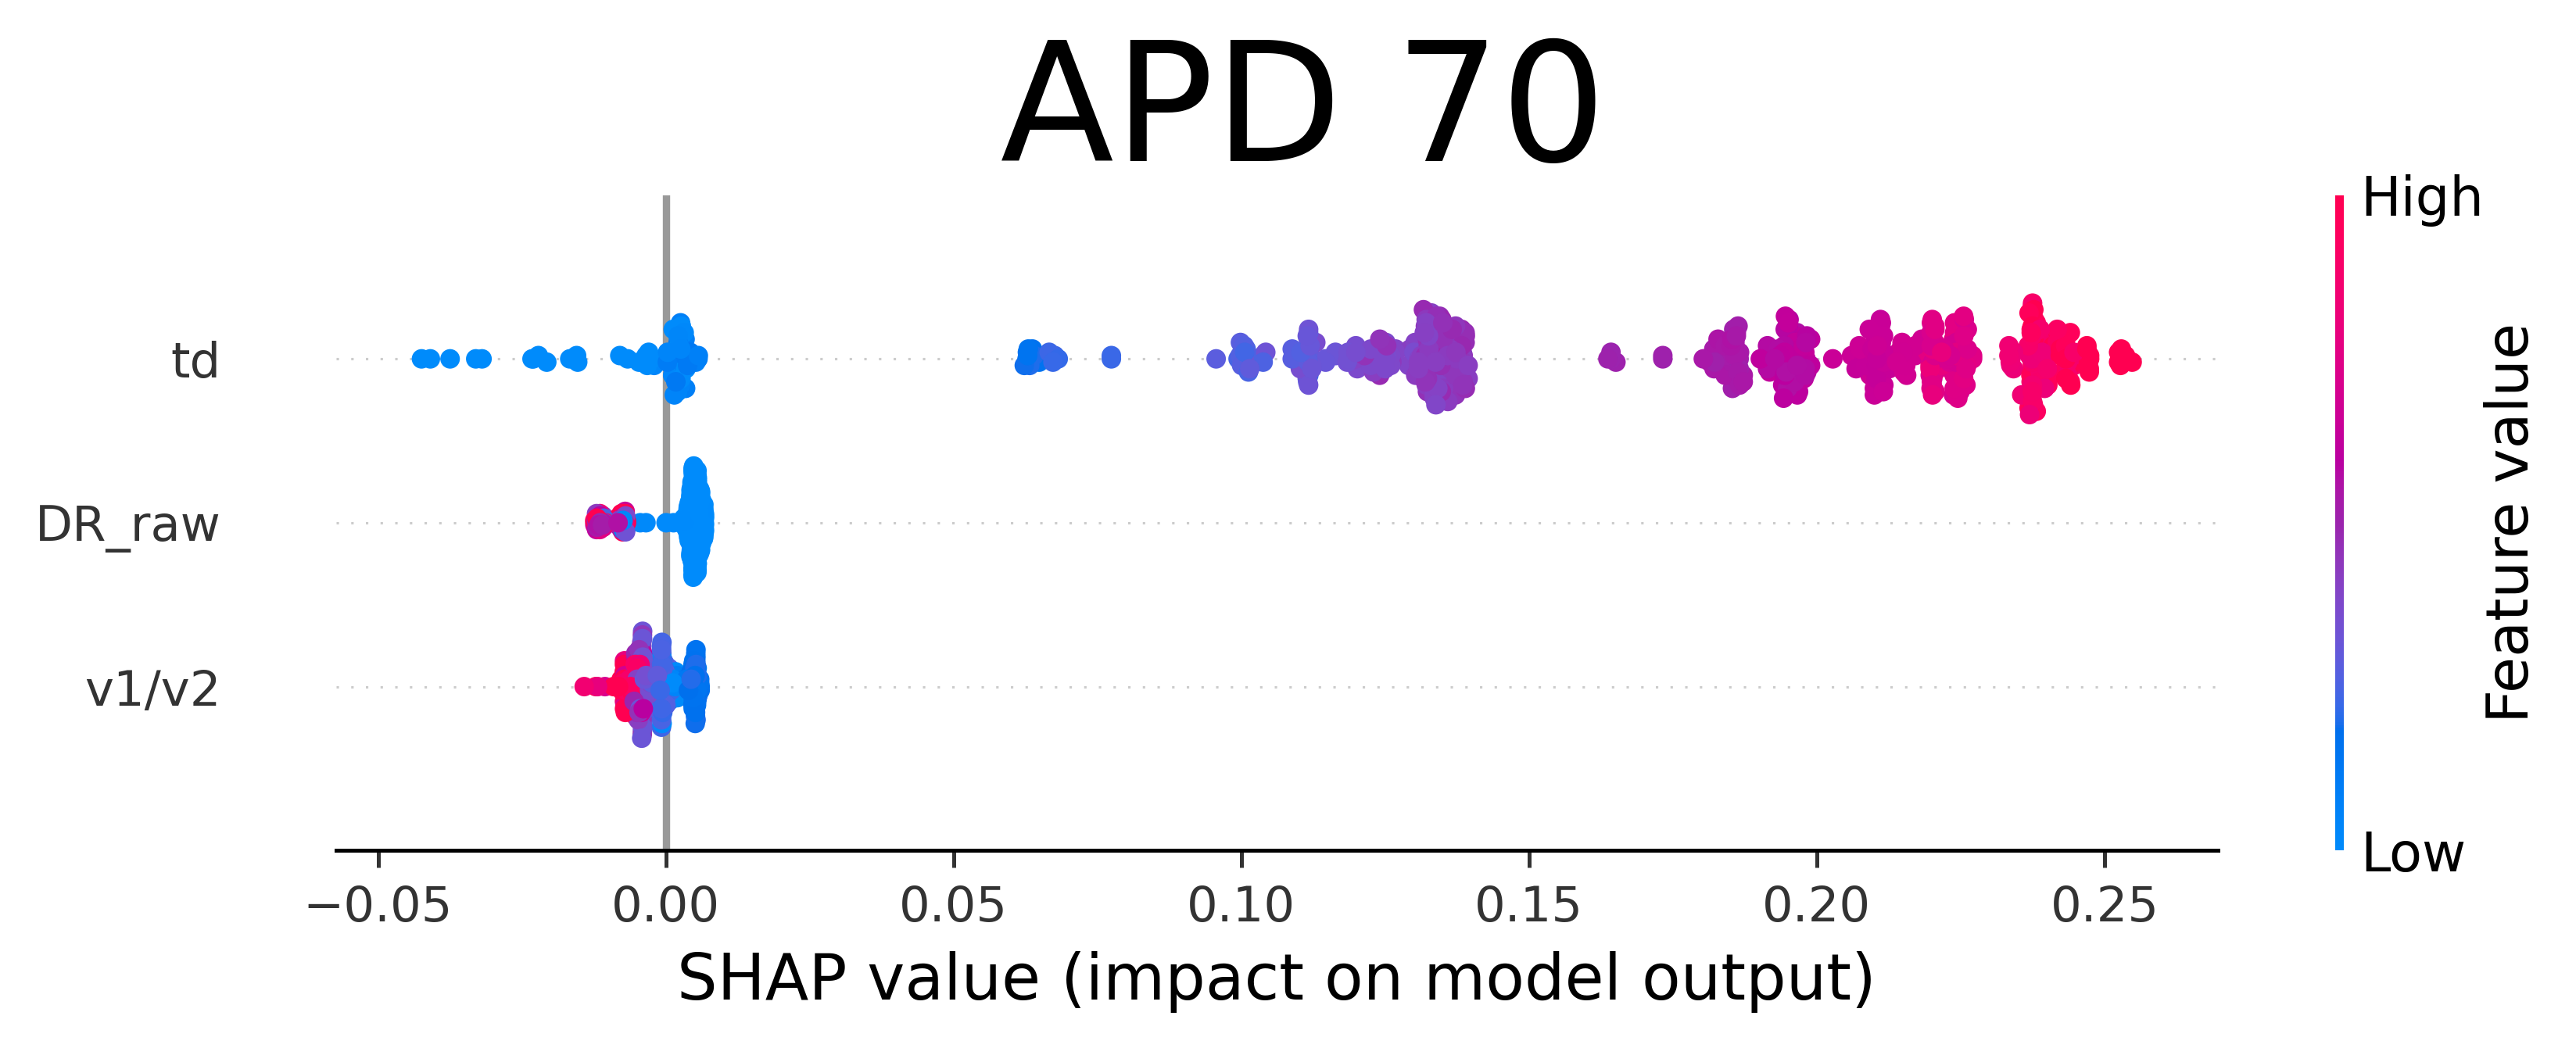

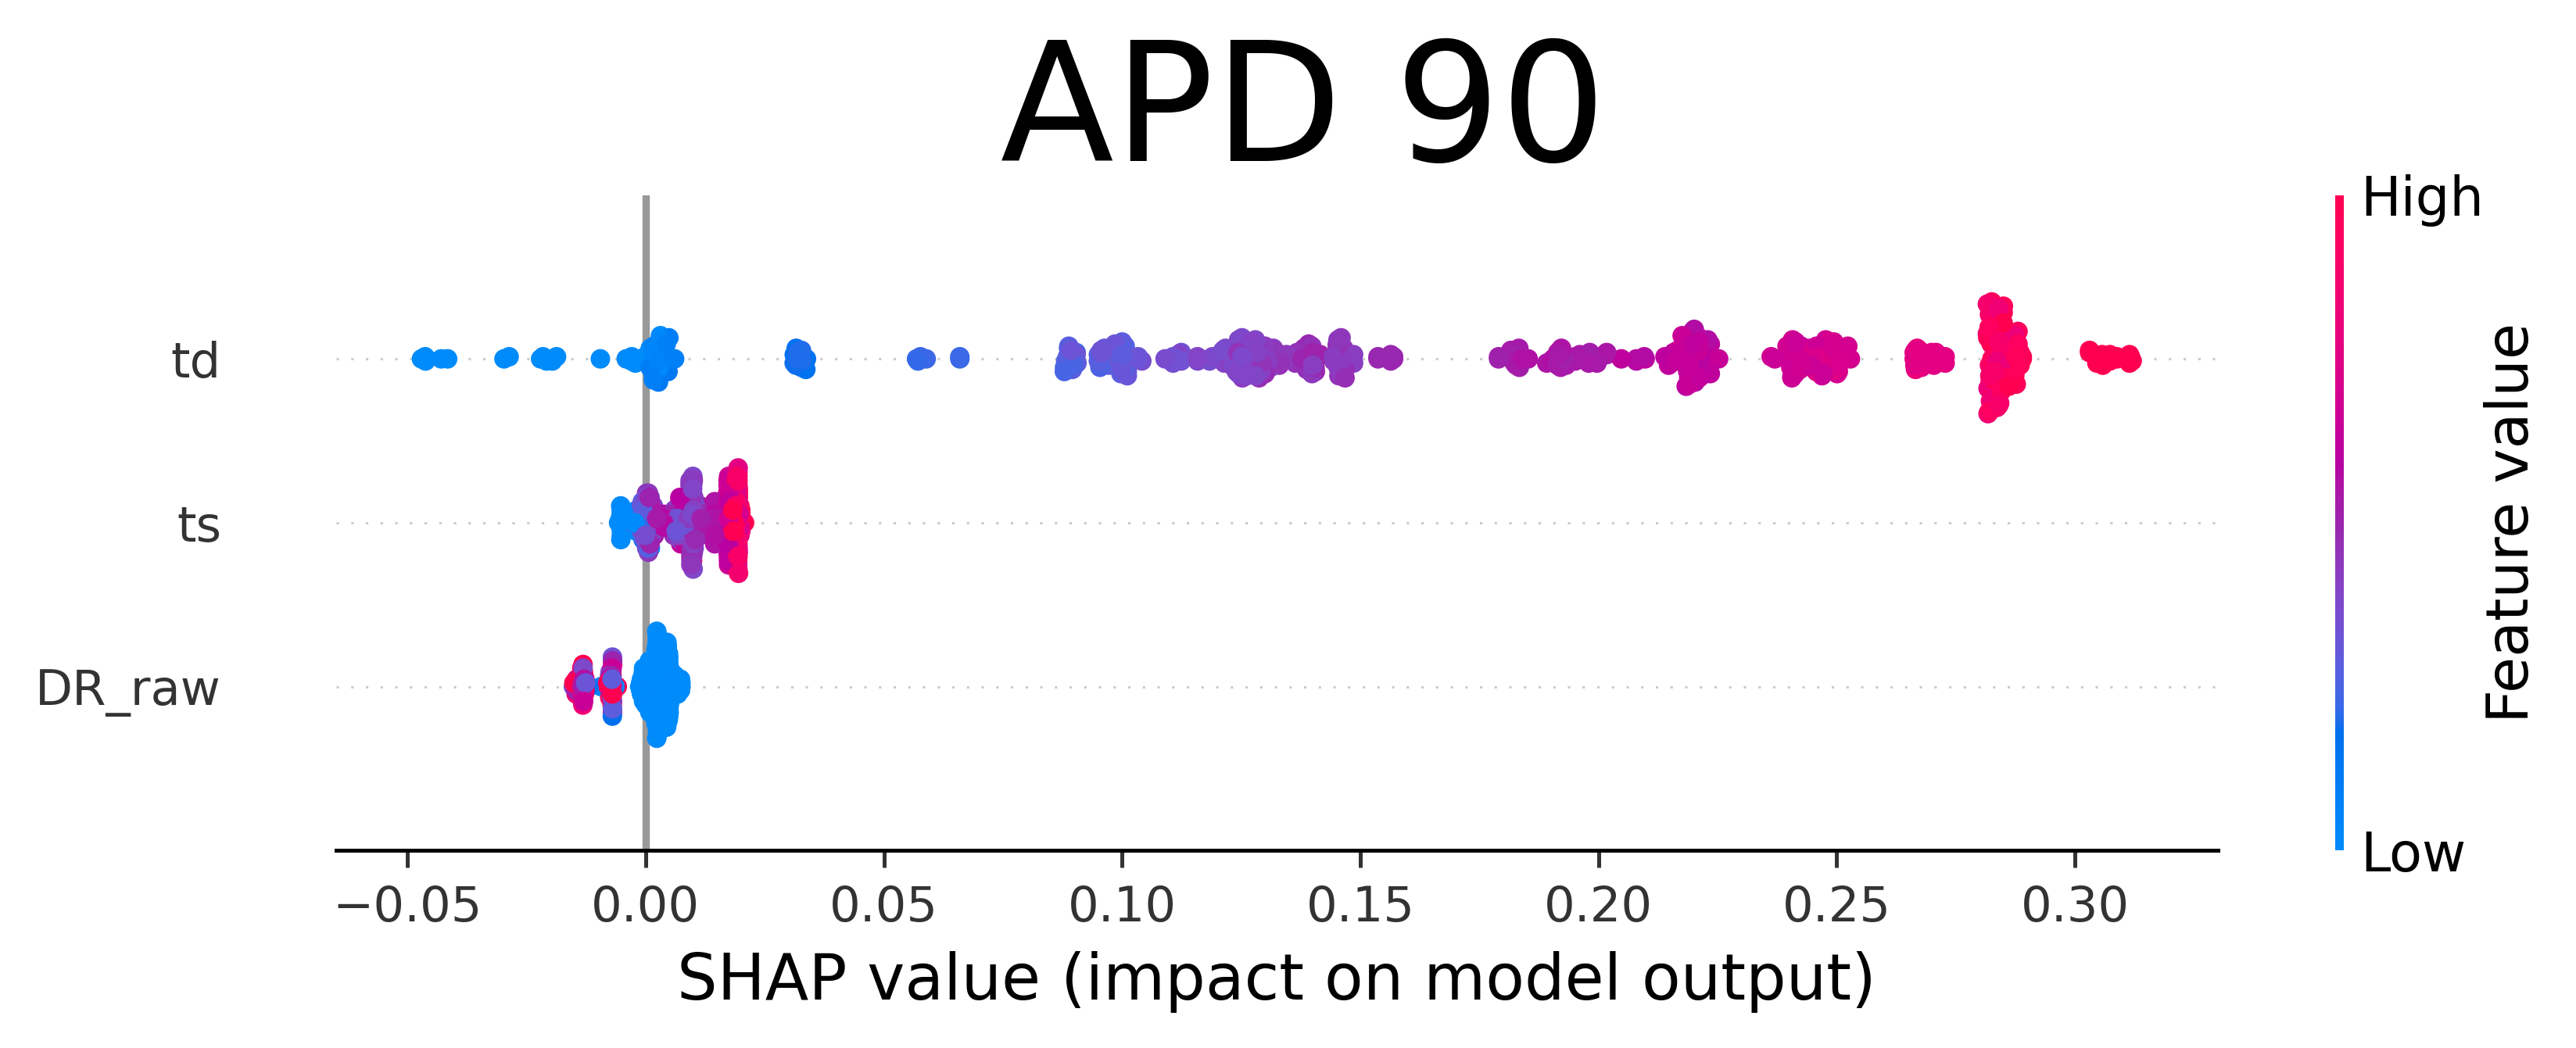

In [8]:
explainer = shap.TreeExplainer(xg_model)
shap_values = explainer.shap_values(z[eap_xg_columns_screened])
shap_values2 = explainer(z[eap_xg_columns_screened])
for i in [2,4,6,8]:
    # fig, ax = plt.subplots(figsize=(5, 5), dpi=450)
    top_features_idx = shap_values[:,:,i].mean(0).argsort()[:][::-1]
    top_features_shap = shap_values[:,:,i][:, top_features_idx]
    top_feature_names = [eap_xg_columns_screened[idx] for idx in top_features_idx]
    plt.figure(figsize=(10,10), dpi=450)
    shap.summary_plot(top_features_shap, z[eap_xg_columns_screened].iloc[:, top_features_idx], 
                      feature_names=top_feature_names, plot_type='dot',
                      max_display = 3,
                      show=False)
    plt.title(f' APD {(i+1)*10}', fontsize=34)  # Set the title font size
    plt.tick_params(labelsize=10)  # Set the tick labels font size
    plt.show()
